# Thư viện

In [16]:
# Cài đặt thư viện XGBoost
!pip install xgboost

In [17]:
# Các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Tải và đọc dữ liệu

In [18]:
# Tải dữ liệu
# https://drive.google.com/file/d/1WkVx5tinsxuU3SnIwLNiYU7X2Sqo3vgG/view?usp=sharing
!gdown 1WkVx5tinsxuU3SnIwLNiYU7X2Sqo3vgG

Downloading...
From: https://drive.google.com/uc?id=1WkVx5tinsxuU3SnIwLNiYU7X2Sqo3vgG
To: c:\Users\admin\OneDrive\Máy tính\Exam_AIO2024\AIO_2024_note\Module_3\Source Codes\XGBoost\employee_data.csv

  0%|          | 0.00/14.2k [00:00<?, ?B/s]
100%|██████████| 14.2k/14.2k [00:00<00:00, 5.64MB/s]


In [19]:
# Đọc dữ liệu
data = pd.read_csv('employee_data.csv')
data.head()

,ID,Gender,Experience (Years),Position,Salary
0,1,F,4,DevOps Engineer,109976
1,2,M,6,DevOps Engineer,120088
2,3,M,17,Web Developer,181301
3,4,M,7,Systems Administrator,77530
4,5,F,13,Systems Administrator,152397


In [20]:
data.describe()

,ID,Experience (Years),Salary
count,400.000000,400.000000,400.00000
mean,200.500000,9.670000,131701.19750
std,115.614301,6.101571,43351.50899
min,1.000000,0.000000,43643.00000
25%,100.750000,4.000000,100484.75000
50%,200.500000,10.000000,128561.50000
75%,300.250000,15.000000,157735.00000
max,400.000000,20.000000,269950.00000


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  400 non-null    int64 
 1   Gender              400 non-null    object
 2   Experience (Years)  400 non-null    int64 
 3   Position            400 non-null    object
 4   Salary              400 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 15.8+ KB


# Tiền xử lý

In [22]:
# Mã hóa giới tính và vị trí công việc
label_encoder_gender = LabelEncoder()
label_encoder_position = LabelEncoder()

data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])
data['Position'] = label_encoder_position.fit_transform(data['Position'])

X = data.drop(columns=['ID', 'Salary'])
y = data['Salary']

In [23]:
print(X.head())

   Gender  Experience (Years)  Position
0       0                   4         2
1       1                   6         2
2       1                  17        10
3       1                   7         8
4       0                  13         8


In [24]:
print(y.head())

0    109976
1    120088
2    181301
3     77530
4    152397
Name: Salary, dtype: int64


In [25]:
# Chia tập dữ liệu thành tập train và test với tỉ lệ (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((320, 3), (320,), (80, 3), (80,))

# Khởi tạo các tham số của mô hình XGBoost

#### Câu 1: Dựa vào đoạn mã được cung cấp để trả lời câu hỏi, Mô hình XGBoost được khởi tạo đúng với mô tả nào sau đây?

A) Mô hình dùng cho bài toán phân loại, có 50 cây và đặt `random_state` để điều chỉnh số lượng cây trong mô hình.

B) Mô hình dùng cho bài toán phân loại, có 42 cây và `random_state` để giúp đảm bảo kết quả có thể tái hiện lại.

C) Mô hình dùng cho bài toán hồi quy, có 50 cây và `random_state` để điều chỉnh số lượng cây trong mô hình.

D) Mô hình dùng cho bài toán hồi quy, có 50 cây và `random_state` để giúp đảm bảo kết quả có thể tái hiện lại.

Đáp án đúng: D


In [26]:
# Định nghĩa các tham số cho mô hình XGBoost
params = {
    'n_estimators': 50,
    'random_state': 42
}

# Khởi tạo mô hình XGBoost với các tham số đã định nghĩa
xgb_model = XGBRegressor(**params)

# Huấn luyện mô hình XGBoost

In [27]:
# Huấn luyện mô hình
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=50,
             n_jobs=None, num_parallel_tree=None, ...)

#### Câu 2: Sau khi huấn luyện mô hình trên. Đâu là đặc trưng được sử dụng nhiều nhất để phân nhánh?
Hãy tìm hiểu và sử dụng hàm ```.get_score()``` với tham số ```importance_type='weight'```.

Tài liệu tham khảo: https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.Booster.get_score

A) Gender

B) Experience

C) Position

D) Salary

Đáp án đúng: B


In [28]:
scores = xgb_model.get_booster().get_score(importance_type='weight')
scores

{'Gender': 302.0, 'Experience (Years)': 1041.0, 'Position': 765.0}

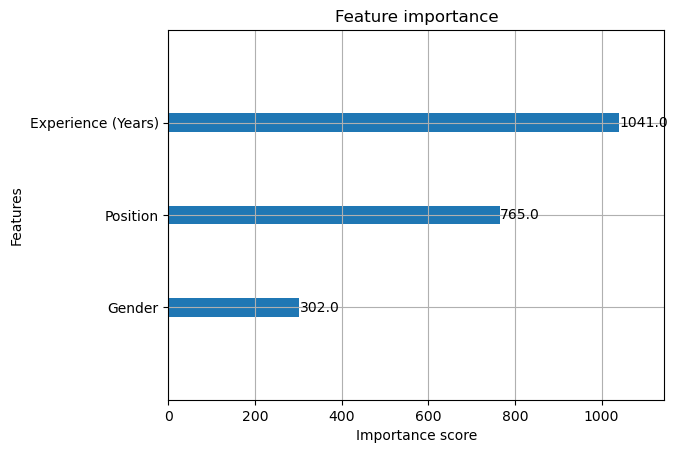

In [29]:
xgb.plot_importance(xgb_model, importance_type='weight')
plt.show()

#### Câu 3: Hãy in ra cây đầu tiên (0). Điều kiện để phân nhánh lần thứ 2 (Root Node tính là 1 lần) được hiển thị trên hình là?
Hãy tìm hiểu và sử dụng hàm ```.plot_tree()``` với tham số bắt buộc phải có là ```num_trees=0```.

Nếu hình quá nhỏ, hãy tìm thêm các tham số cho hàm `.plot_tree()` và điều chỉnh kích thước hình.

Tài liệu tham khảo: https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.plot_tree

A) Position < 5

B) Position > 5

C) Experience < 8

D) Experience > 8

Đáp án đúng: A


In [38]:
import os
os.environ['PATH'] += os.pathsep + "C:/Users/admin/Downloads/windows_10_cmake_Release_Graphviz-12.2.1-win64/Graphviz-12.2.1-win64/bin"

c:\Users\admin\anaconda3\Lib\site-packages\xgboost\plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


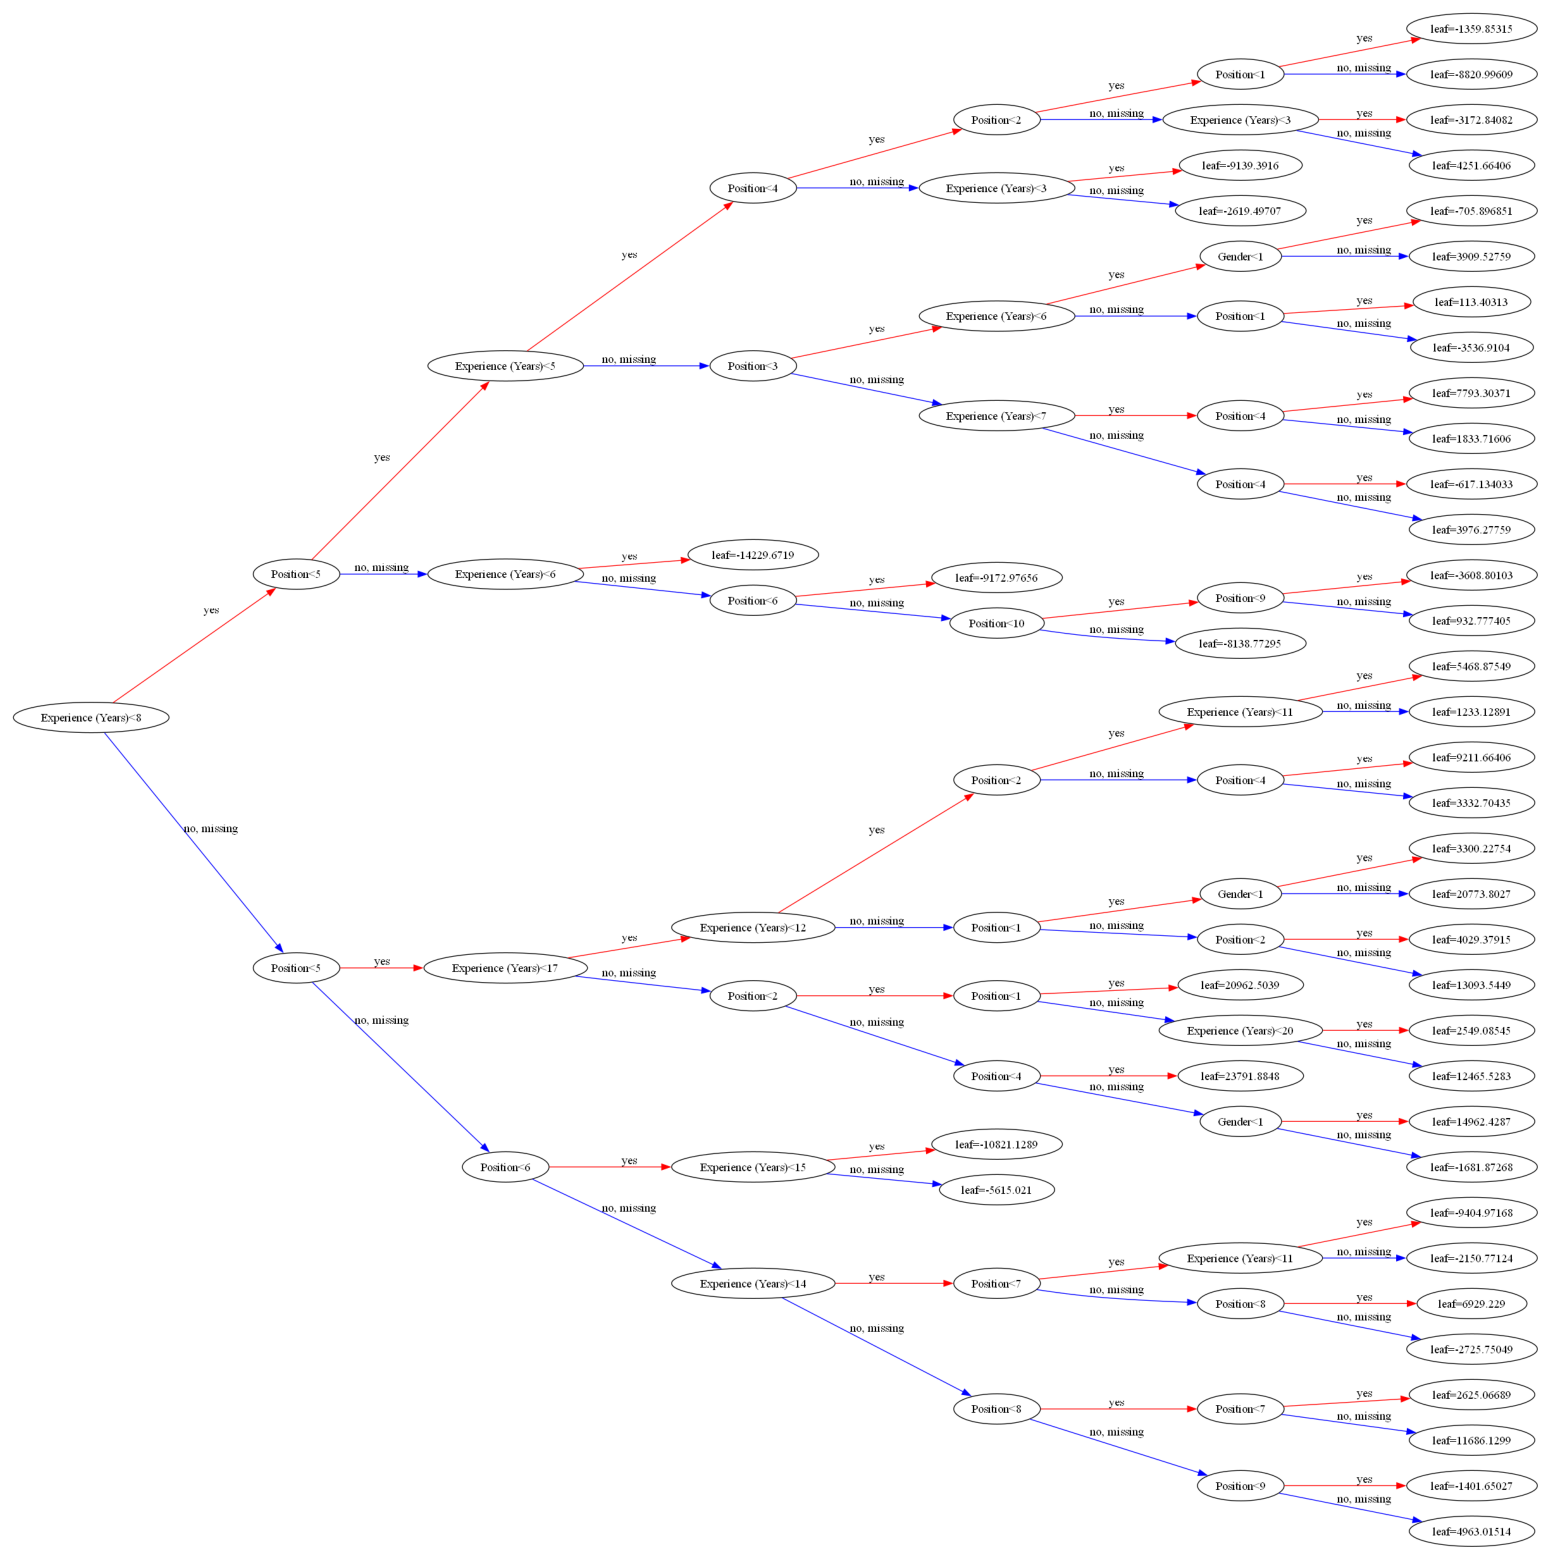

In [39]:

plt.figure(figsize=(40, 20))
xgb.plot_tree(xgb_model, num_trees=0, ax=plt.gca(), rankdir='LR')
plt.show()
# Lưu ý: Nếu vẫn gặp lỗi, hãy tải và cài đặt Graphviz từ https://graphviz.gitlab.io/download/
# Sau đó thêm đường dẫn thư mục cài đặt Graphviz (chứa dot.exe) vào biến môi trường PATH của hệ điều hành Windows.

#### Câu 4: Hãy in ra cây đầu tiên (0). Nếu một input có Experience (Year) = 4 và Position = 4, cây thứ 0 này sẽ trả về kết quả là?
Hãy tìm hiểu và sử dụng hàm ```.plot_tree()``` với tham số bắt buộc phải có là ```num_trees=0```.

Nếu hình quá nhỏ, hãy tìm thêm các tham số cho hàm .plot_tree() và điều chỉnh kích thước hình.

Tài liệu tham khảo: https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.plot_tree

A) -14229.6719

B) -9139.3916

C) 4251.66406

D) -2619.49707

Đáp án đúng: D


# Đánh giá mô hình XGBoost

#### Câu 4: Giá trị đánh giá $Mean~Square~Error$ và $R^2 ~Score$ trên tập Test cho mô hình XGBoost trên xấp xỉ là?
Hãy sử dụng hàm ```mean_squared_error()``` và ```r2_score()```

A) MSE = 1182725453, R2 Score = 0.3668

B) MSE = 1325373291, R2 Score = 0.2904

C) MSE = 1150167002, R2 Score = 0.3842

D) MSE = 1150167002, R2 Score = 0.2904

Đáp án đúng: A


In [40]:
# Dự đoán trên tập test
y_pred = xgb_model.predict(X_test)  # Dự đoán giá trị trên tập test dựa trên mô hình đã huấn luyện

# Đánh giá mô hình trên tập test với MSE và R2
origin_mse = mean_squared_error(y_test, y_pred)
origin_r2 = r2_score(y_test, y_pred)

print('MSE =', origin_mse)
print('R^2 Score =', origin_r2)

MSE = 1182725453.8179893
R^2 Score = 0.3668612792705458


# Bonus

## Cải thiện mô hình XGBoost bằng cách tìm các siêu tham số tối ưu
Để tối ưu hóa các siêu tham số (hyperparameters) cho mô hình XGBoost, chúng ta có thể sử dụng các phương pháp tự động tìm kiếm như:
1. Grid Search: Tìm kiếm trên một lưới giá trị cố định của các siêu tham số.
2. Random Search: Tìm kiếm ngẫu nhiên trong không gian các siêu tham số.
3. Bayesian Optimization: Sử dụng các mô hình xác suất để tìm kiếm tối ưu hơn.

In [41]:
# Khởi tạo trước các danh sách các siêu tham số và các giá trị muốn thử nghiệm
param_grid = {
    'max_depth': [3, 5, 7],                 # Độ sâu của cây
    'learning_rate': [0.01, 0.03, 0.05],    # Tốc độ học (learning rate / eta)
    'n_estimators': [25, 50, 75],           # Số lượng cây quyết định
    'random_state': [42]                    # Đặt seed để đảm bảo kết quả có thể tái hiện
}

**candidates** là số lượng tổ hợp các siêu tham số mà Grid Search sẽ thử nghiệm. Mỗi tổ hợp ứng với một bộ giá trị siêu tham số (ví dụ: max_depth, learning_rate, n_estimators, v.v.).

In [42]:
import numpy as np

# Tính tổng số tổ hợp
n_candidates = np.prod([len(v) for v in param_grid.values()])
print(f"Số lượng tổ hợp siêu tham số (candidates): {n_candidates}")

Số lượng tổ hợp siêu tham số (candidates): 27


### Grid Search

In [43]:
# Khởi tạo mô hình XGBRegressor (XGBoost cho bài toán hồi quy)
xgb_reg = XGBRegressor()

# Sử dụng GridSearchCV để tìm kiếm siêu tham số tốt nhất trên lưới các giá trị
grid_search = GridSearchCV(estimator=xgb_reg,                   # Sử dụng mô hình XG Boost đã khởi tạo
                           param_grid=param_grid,               # Sử dụng các siêu tham số đã tạo trước
                           scoring='neg_mean_squared_error',    # Sử dụng RMSE (root mean squared error) dưới dạng tiêu chí đánh giá
                           cv=3,                                # Chia dữ liệu thành 3 tập huấn luyện và kiểm tra (cross-validation)
                           verbose=1,                           # In ra quá trình thực hiện
                           n_jobs=-1)                           # Sử dụng tất cả các CPU có sẵn để tính toán

# Huấn luyện mô hình với Grid Search
grid_search.fit(X_train, y_train)

# Lấy các siêu tham số tốt nhất từ quá trình tìm kiếm
best_params_grid = grid_search.best_params_
print(f'Cấu hình tốt nhất: {best_params_grid}')

# Dự đoán trên tập test
y_pred = grid_search.best_estimator_.predict(X_test)  # Dự đoán giá trị trên tập test dựa trên mô hình tối ưu nhất

# Đánh giá mô hình trên tập test với MSE và R2
grid_mse = mean_squared_error(y_test, y_pred)
grid_r2 = r2_score(y_test, y_pred)

print('MSE =', grid_mse)
print('R^2 Score =', grid_r2)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Cấu hình tốt nhất: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 75, 'random_state': 42}
MSE = 670018628.9696182
R^2 Score = 0.6413244204381436


### Random Search

In [44]:
# Khởi tạo mô hình XGBRegressor
xgb_reg = XGBRegressor()

# Sử dụng RandomizedSearchCV cho tìm kiếm ngẫu nhiên siêu tham số
random_search = RandomizedSearchCV(estimator=xgb_reg,                 # Sử dụng mô hình XG Boost đã khởi tạo
                                   param_distributions=param_grid,    # Sử dụng các siêu tham số đã tạo trước
                                   scoring='neg_mean_squared_error',  # Tiêu chí đánh giá: MSE (Mean Squared Error)
                                   cv=3,                              # Cross-validation với 3 lần chia
                                   n_iter=50,                         # Chỉ thử nghiệm 50 tổ hợp ngẫu nhiên thay vì tất cả
                                   verbose=1,                         # In ra quá trình tìm kiếm
                                   n_jobs=-1)                         # Sử dụng tất cả các CPU để tính toán

# Huấn luyện mô hình với Random Search
random_search.fit(X_train, y_train)

# Lấy các siêu tham số tốt nhất từ Random Search
best_params_random = random_search.best_params_
print(f'Cấu hình tốt nhất: {best_params_random}')

# Dự đoán trên tập test
y_pred = random_search.best_estimator_.predict(X_test)  # Dự đoán giá trị trên tập test dựa trên mô hình tối ưu nhất

# Đánh giá mô hình trên tập test với MSE và R2
random_mse = mean_squared_error(y_test, y_pred)
random_r2 = r2_score(y_test, y_pred)

print('MSE =', random_mse)
print('R^2 Score =', random_r2)


Fitting 3 folds for each of 27 candidates, totalling 81 fits


c:\Users\admin\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 27 is smaller than n_iter=50. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Cấu hình tốt nhất: {'random_state': 42, 'n_estimators': 75, 'max_depth': 3, 'learning_rate': 0.05}
MSE = 670018628.9696182
R^2 Score = 0.6413244204381436


## Trực quan hoá đánh giá của các mô hình trên tập Train

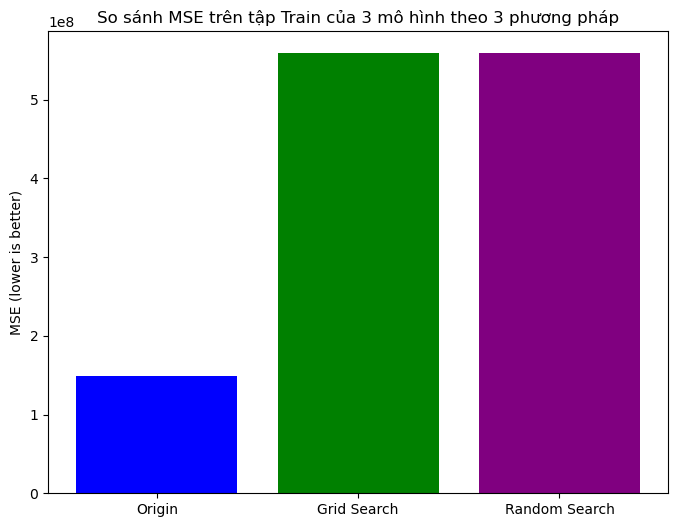

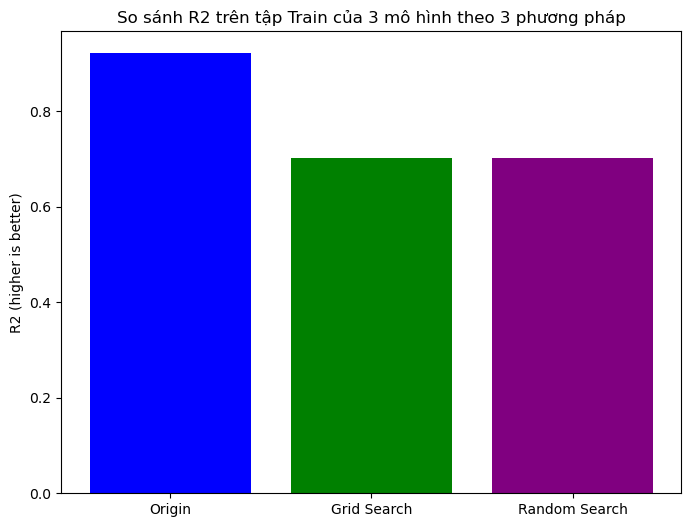

In [45]:
# Dự đoán trên tập train với 3 mô hình
ori_y_pred = xgb_model.predict(X_train)
grid_y_pred = grid_search.best_estimator_.predict(X_train)
random_y_pred = random_search.best_estimator_.predict(X_train)

# Tính MSE trên tập train
origin_mse = mean_squared_error(y_train, ori_y_pred)
grid_mse = mean_squared_error(y_train, grid_y_pred)
random_mse = mean_squared_error(y_train, random_y_pred)

# Tính R2 trên tập train
origin_r2 = r2_score(y_train, ori_y_pred)
grid_r2 = r2_score(y_train, grid_y_pred)
random_r2 = r2_score(y_train, random_y_pred)

methods = ['Origin', 'Grid Search', 'Random Search']
mse_values = [origin_mse, grid_mse, random_mse]
r2_values = [origin_r2, grid_r2, random_r2]

plt.figure(figsize=(8, 6))
plt.bar(methods, mse_values, color=['blue', 'green', 'purple'])
plt.title('So sánh MSE trên tập Train của 3 mô hình theo 3 phương pháp')
plt.ylabel('MSE (lower is better)')
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(methods, r2_values, color=['blue', 'green', 'purple'])
plt.title('So sánh R2 trên tập Train của 3 mô hình theo 3 phương pháp')
plt.ylabel('R2 (higher is better)')
plt.show()

## Trực quan hoá đánh giá của các mô hình trên tập Test

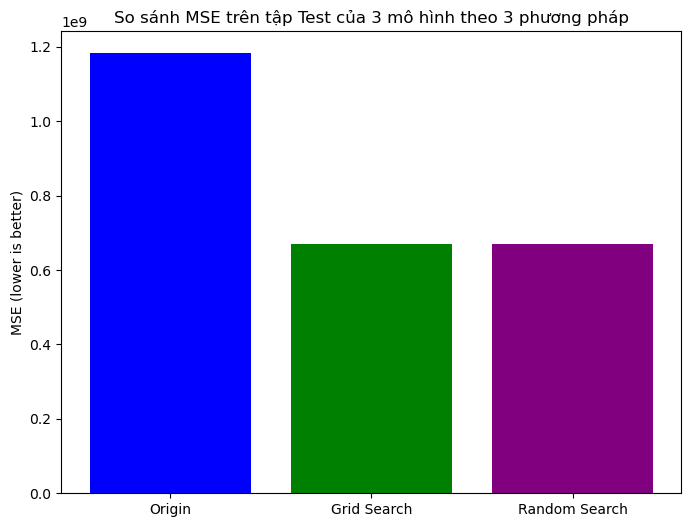

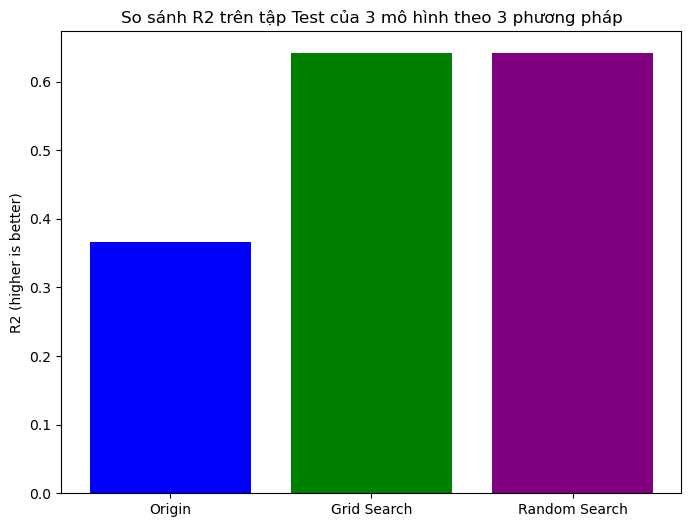

In [46]:
# Dự đoán trên tập test với 3 mô hình
ori_y_pred = xgb_model.predict(X_test)
grid_y_pred = grid_search.best_estimator_.predict(X_test)
random_y_pred = random_search.best_estimator_.predict(X_test)

# Tính MSE trên tập test
origin_mse = mean_squared_error(y_test, ori_y_pred)
grid_mse = mean_squared_error(y_test, grid_y_pred)
random_mse = mean_squared_error(y_test, random_y_pred)

# Tính R2 trên tập test
origin_r2 = r2_score(y_test, ori_y_pred)
grid_r2 = r2_score(y_test, grid_y_pred)
random_r2 = r2_score(y_test, random_y_pred)

methods = ['Origin', 'Grid Search', 'Random Search']
mse_values = [origin_mse, grid_mse, random_mse]
r2_values = [origin_r2, grid_r2, random_r2]

plt.figure(figsize=(8, 6))
plt.bar(methods, mse_values, color=['blue', 'green', 'purple'])
plt.title('So sánh MSE trên tập Test của 3 mô hình theo 3 phương pháp')
plt.ylabel('MSE (lower is better)')
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(methods, r2_values, color=['blue', 'green', 'purple'])
plt.title('So sánh R2 trên tập Test của 3 mô hình theo 3 phương pháp')
plt.ylabel('R2 (higher is better)')
plt.show()

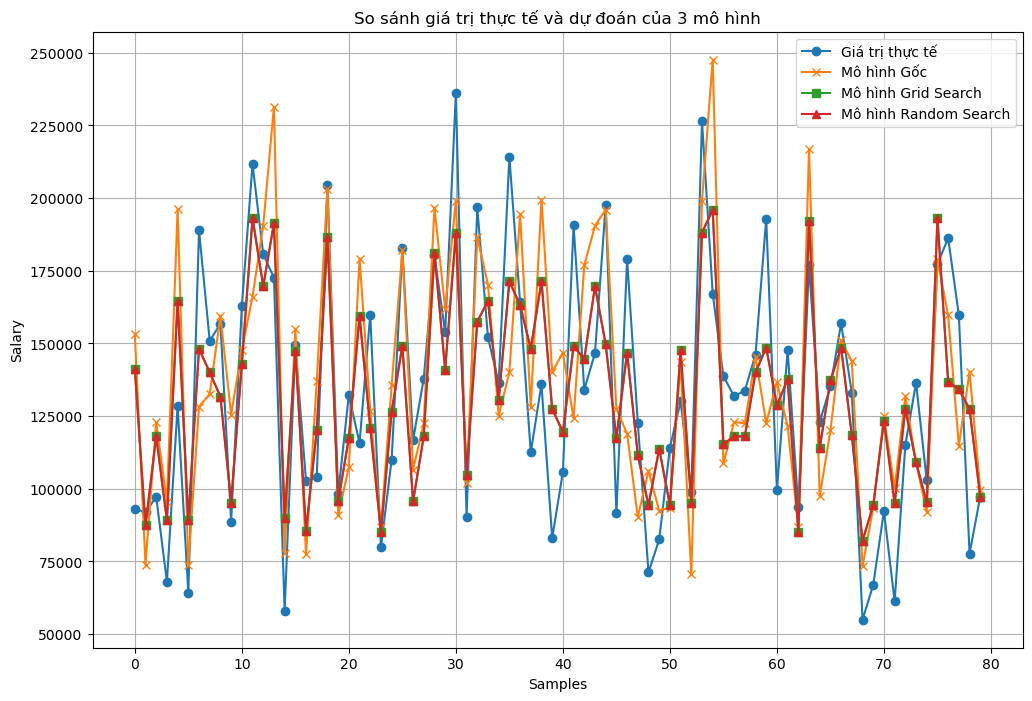

In [47]:
# Biểu đồ đường: So sánh giá trị thực tế với 3 mô hình
plt.figure(figsize=(12, 8))
plt.plot(y_test.values, label='Giá trị thực tế', marker='o')
plt.plot(ori_y_pred, label='Mô hình Gốc', marker='x')
plt.plot(grid_y_pred, label='Mô hình Grid Search', marker='s')
plt.plot(random_y_pred, label='Mô hình Random Search', marker='^')
plt.title('So sánh giá trị thực tế và dự đoán của 3 mô hình')
plt.xlabel('Samples')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

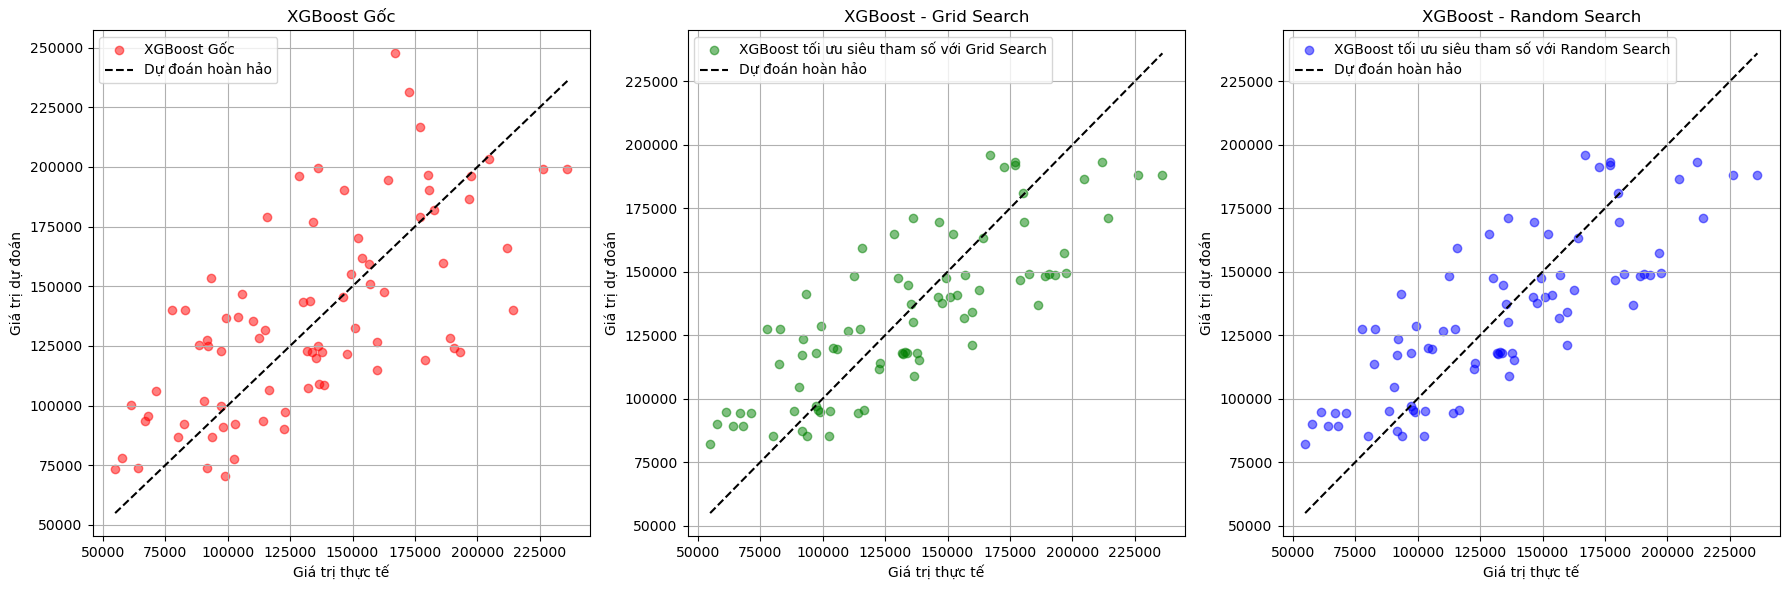

In [48]:
# Tạo 3 subplots cho 3 mô hình (1 hàng, 3 cột)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Danh sách dự đoán, nhãn, và tiêu đề cho các mô hình
pred_list = [ori_y_pred, grid_y_pred, random_y_pred]
label_list = ['XGBoost Gốc', 'XGBoost tối ưu siêu tham số với Grid Search', 'XGBoost tối ưu siêu tham số với Random Search']
title_list = ['XGBoost Gốc', 'XGBoost - Grid Search', 'XGBoost - Random Search']
color_list = ['red', 'green', 'blue']

# Biểu đồ phân tán cho từng mô hình trong từng subplot
for i, (pred, label, title, color) in enumerate(zip(pred_list, label_list, title_list, color_list)):
    axs[i].scatter(y_test, pred, color=color, alpha=0.5, label=label)
    axs[i].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', label='Dự đoán hoàn hảo')
    axs[i].set_title(title)
    axs[i].set_xlabel('Giá trị thực tế')
    axs[i].set_ylabel('Giá trị dự đoán')
    axs[i].legend()
    axs[i].grid(True)

# Hiển thị các biểu đồ
plt.tight_layout()
plt.show()